In [1]:
import tensorflow as tf

c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [2]:
from tensorflow.examples.tutorials.mnistnist import input_data

In [3]:
minst = input_data.read_data_sets("MNIST_data/", one_hot=True)

W1116 23:46:29.333938  9344 deprecation.py:323] From <ipython-input-3-ea12b6f12ec5>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1116 23:46:29.335922  9344 deprecation.py:323] From c:\python37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1116 23:46:29.454962  9344 deprecation.py:323] From c:\python37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W1116 23:46:32.694337  9344 deprecation.py:323] From c:\python37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W1116 23:46:32.698306  9344 deprecation.py:323] From c:\python37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


W1116 23:46:33.352035  9344 deprecation.py:323] From c:\python37\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
type(minst)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
minst.train.images.shape

(55000, 784)

In [7]:
minst.train.num_examples

55000

In [8]:
minst.test.num_examples

10000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
minst.train.images[1].shape

(784,)

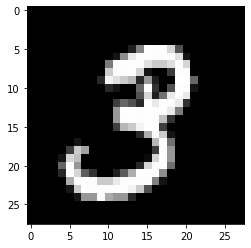

In [14]:
plt.imshow(minst.train.images[1].reshape(28,28), cmap='gist_gray')

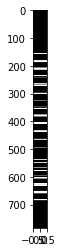

In [15]:
# see the image is converted in single pixel of 784
plt.imshow(minst.train.images[1].reshape(784,1), cmap='gist_gray', aspect=0.02)

In [16]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [18]:
w = tf.Variable(tf.zeros([784, 10]))

In [19]:
b = tf.Variable(tf.zeros([10]))

In [20]:
y = tf.matmul(x,w)+b

In [21]:
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [22]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [25]:
train = optimizer.minimize(cross_entropy)

In [26]:
init = tf.global_variables_initializer()

In [31]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        
        batch_x, batch_y = minst.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
        
    matches = tf.equal(tf.argmax(y, 1),tf.argmax(y_true, 1))
    
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.run(acc, feed_dict={x:minst.test.images, y_true:minst.test.labels}))

0.9201
